In [1]:
# data_collection.py
import pandas as pd
from faker import Faker
import random

fake = Faker()
data = []

for _ in range(200000):
    record = {
        "campaign_id": fake.uuid4(),
        "campaign_name": fake.bs(),
        "start_date": fake.date_between(start_date='-2y', end_date='today'),
        "end_date": fake.date_between(start_date='today', end_date='+1y'),
        "budget": round(random.uniform(1000, 100000), 2),
        "channel": random.choice(["Email", "Social Media", "TV", "Radio", "Search"]),
        "clicks": random.randint(0, 10000),
        "impressions": random.randint(1000, 100000),
        "conversions": random.randint(0, 5000),
        "region": fake.state()
    }
    data.append(record)

df = pd.DataFrame(data)
df.to_csv("campaign_data.csv", index=False)


In [3]:
# data_cleaning.py
import pandas as pd

df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\Campaign Intelligence Suite (marketing & Ads)\\campaign_data.csv')




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   campaign_id    200000 non-null  object 
 1   campaign_name  200000 non-null  object 
 2   start_date     200000 non-null  object 
 3   end_date       200000 non-null  object 
 4   budget         200000 non-null  float64
 5   channel        200000 non-null  object 
 6   clicks         200000 non-null  int64  
 7   impressions    200000 non-null  int64  
 8   conversions    200000 non-null  int64  
 9   region         200000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 15.3+ MB


In [5]:
df.describe()

,budget,clicks,impressions,conversions
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,50584.415298,5000.918765,50574.176810,2495.800230
std,28539.130278,2888.334538,28574.922742,1448.683719
min,1000.020000,0.000000,1000.000000,0.000000
25%,25932.022500,2499.000000,25830.000000,1236.000000
50%,50676.345000,5013.000000,50565.500000,2493.000000
75%,75284.320000,7506.000000,75320.250000,3758.000000
max,99998.510000,10000.000000,100000.000000,5000.000000


In [6]:
df.head(10)

,campaign_id,campaign_name,start_date,end_date,budget,channel,clicks,impressions,conversions,region
0,9ab23945-f40f-40a1-8350-1d88e5d935f8,scale interactive architectures,2025-05-19,2025-09-04,64811.62,TV,3594,32645,3431,South Dakota
1,71d06ae4-fa1c-4252-ace3-5f46ae820874,seize leading-edge e-markets,2023-11-14,2026-02-07,12911.40,Social Media,481,29793,3911,Iowa
2,d40eae1f-f00d-42a2-b1d9-458b490e9a64,revolutionize user-centric solutions,2023-11-23,2025-10-26,96295.41,Social Media,7656,89049,3340,Tennessee
3,4ae3a7f7-7c20-4fc0-895d-e34161944772,whiteboard value-added web services,2024-11-23,2025-09-02,66280.49,Social Media,7250,84740,874,Michigan
4,26c358b9-cfd2-4b97-9a02-7dbe97982ca6,disintermediate mission-critical web services,2023-12-04,2025-12-21,25852.67,Social Media,9398,48500,762,Rhode Island
5,b2bd62a5-53e5-4012-a803-7ac37f9068e9,mesh scalable eyeballs,2024-01-30,2025-11-16,26819.41,Email,9544,31455,2504,Montana
6,2cf327ca-9fba-425c-bc40-11fb26e7024f,grow next-generation interfaces,2023-11-22,2026-02-10,9116.41,Social Media,8732,76838,2341,California
7,52cdff1f-7857-498d-ad57-19ac57b805f4,transform enterprise technologies,2024-12-20,2026-03-08,5562.05,Radio,8661,7525,3455,North Dakota
8,3622cba0-dbf5-4eb8-a8df-97005815a183,engage enterprise models,2023-08-24,2026-06-20,59531.57,Search,7276,92715,4799,Arkansas
9,5c7f40c2-8beb-4612-b8c8-36ebd86a77b2,evolve dynamic portals,2023-09-03,2025-12-08,86060.26,Search,7948,92869,1232,Vermont


In [11]:
df.duplicated().sum()

np.int64(0)

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
# convert dates
df["start_date"]=pd.to_datetime(df["start_date"])
df["end_date"]=pd.to_datetime(df["end_date"])

In [14]:
df.to_csv("cleaned_campaign.csv",index=False)

In [15]:
# data quality check
import pandas as pd
# Check for nulls
print("Missing values:\n", df.isnull().sum()) 

Missing values:
 campaign_id      0
campaign_name    0
start_date       0
end_date         0
budget           0
channel          0
clicks           0
impressions      0
conversions      0
region           0
dtype: int64


In [16]:
# check logical errors
invalid_dates = df[df["end_date"] < df["start_date"]]
print("Invalid date ranges:\n", invalid_dates)

Invalid date ranges:
 Empty DataFrame
Columns: [campaign_id, campaign_name, start_date, end_date, budget, channel, clicks, impressions, conversions, region]
Index: []


In [17]:
# check budget range
print("budget stats:\n",df["budget"].describe())

budget stats:
 count    200000.000000
mean      50584.415298
std       28539.130278
min        1000.020000
25%       25932.022500
50%       50676.345000
75%       75284.320000
max       99998.510000
Name: budget, dtype: float64


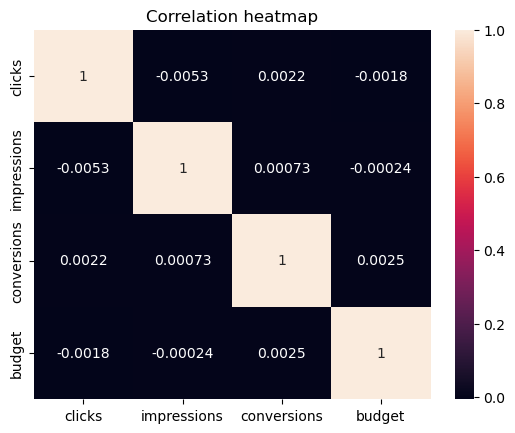

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# correaltion heatmap
sns.heatmap(df[["clicks","impressions","conversions","budget"]].corr(),annot=True)
plt.title("Correlation heatmap")
plt.show()


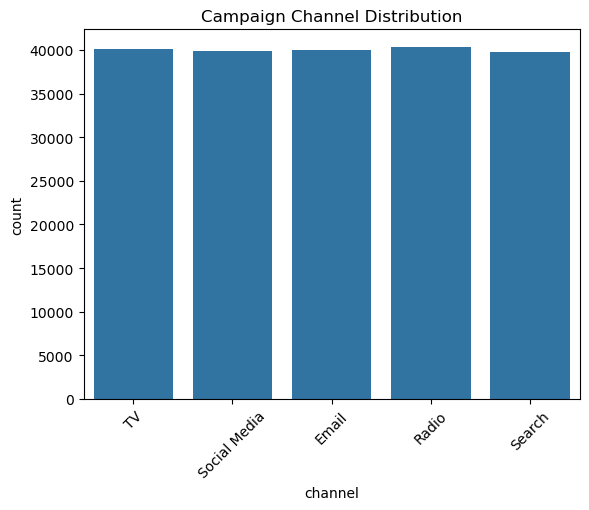

In [19]:
# Channel distribution
sns.countplot(data=df, x="channel")
plt.title("Campaign Channel Distribution")
plt.xticks(rotation=45)
plt.show()

In [20]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load cleaned data
df = pd.read_csv("C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\Campaign Intelligence Suite (marketing & Ads)\\cleaned_campaign.csv")

# Feature engineering
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
df["duration_days"] = (df["end_date"] - df["start_date"]).dt.days

# Features and target
X = df[["budget", "impressions", "clicks", "duration_days"]]
y = df["conversions"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "campaign_model.pkl")


['campaign_model.pkl']

In [4]:
# model_evaluation.py
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load cleaned data
df = pd.read_csv("C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\Campaign_Intelligence_Suite_Marketing_Ads\\cleaned_campaign.csv")

# Feature engineering
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])
df["duration_days"] = (df["end_date"] - df["start_date"]).dt.days

# Define features and target
X = df[["budget", "impressions", "clicks", "duration_days"]]
y = df["conversions"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load model
model = joblib.load("C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\Campaign_Intelligence_Suite_Marketing_Ads\\campaign_model.pkl")

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 2200983.890517555
R² Score: -0.04863637212720251
